100.0%
100.0%
100.0%
100.0%


CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=10, bias=True)
  (relu): ReLU()
)
Epoch 1, Loss: 0.1934
Epoch 2, Loss: 0.0590
Epoch 3, Loss: 0.0443
Epoch 4, Loss: 0.0355
Epoch 5, Loss: 0.0288
Test Accuracy: 98.85%


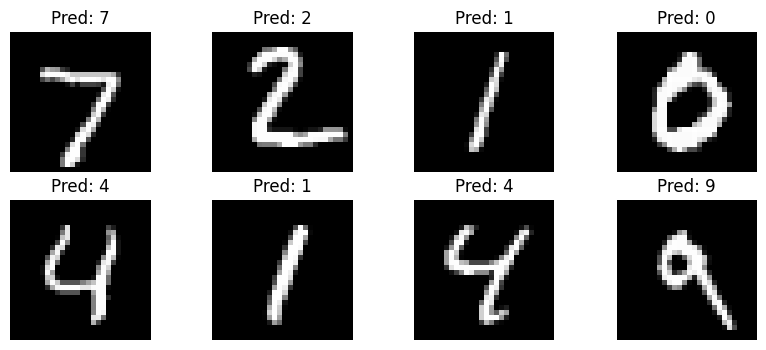

In [2]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


# Transform: convert image to tensor + normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download training data
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# DataLoader: loads data in batches of 64
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True
)

# Test data
test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False
)


class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        # 1 input channel (black & white), 16 output channels (filters)
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)

        # More filters = learn more complex patterns
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)

        # MaxPool reduces dimension by 2×
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layer
        self.fc1 = nn.Linear(32 * 7 * 7, 10)  # 10 classes (digits 0–9)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))   # conv1 + ReLU
        x = self.pool(x)               # downsample
        x = self.relu(self.conv2(x))   # conv2 + ReLU
        x = self.pool(x)               # downsample
        
        x = x.view(-1, 32 * 7 * 7)     # flatten
        
        x = self.fc1(x)                # final output
        return x

model = CNN()
print(model)


criterion = nn.CrossEntropyLoss()       # for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)


epochs = 5

for epoch in range(epochs):
    running_loss = 0

    for images, labels in train_loader:
        optimizer.zero_grad()       # reset gradients
        outputs = model(images)     # forward pass
        loss = criterion(outputs, labels)
        loss.backward()             # backward pass (autograd)
        optimizer.step()            # update weights
        
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


correct = 0
total = 0

with torch.no_grad():  # no gradients in test mode
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # highest score = prediction

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


images, labels = next(iter(test_loader))
outputs = model(images)
_, preds = torch.max(outputs, 1)

plt.figure(figsize=(10,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"Pred: {preds[i].item()}")
    plt.axis('off')
plt.show()

